In [32]:
import pandas as pd

# Load your balanced dataset (after SMOTE application)
df = pd.read_csv("balanced_dataset.csv")


In [34]:
df.head()

,id,dateadded,url,url_status,last_online,threat,tags,urlhaus_link,reporter,Label,...,Has_Suspicious_Keyword,Has_IP,Query_Parameter_Count,Has_Port,Num_Path_Segments,Has_HTTPS,Has_URL_Shortener,digit_letter_ratio,has_encoded_chars,https_www_combo
0,3230050,2024-10-11 12:23:33,http://117.209.4.108:57478/bin.sh,offline,2024-10-11 12:23:33,malware_download,"32-bit,elf,mips,Mozi",https://urlhaus.abuse.ch/url/3230050/,geenensp,1,...,0,1,0,0,1,0,0,1.666666,0,0
1,3177228,2024-09-16 19:43:06,http://154.216.18.121/.c/loginclientbot,offline,2024-09-20 07:22:27,malware_download,"elf,ladvix,opendir",https://urlhaus.abuse.ch/url/3177228/,NDA0E,1,...,1,1,0,0,2,0,0,0.578947,0,0
2,815,2024-11-30 02:10:35,zoho.com,online,2024-11-30 02:10:35,legitimate,none,NaN,Tranco-58PNN,0,...,0,0,0,0,0,-1,0,0.000000,0,0
3,792779,2024-11-30 02:10:35,kp-velenje.si,online,2024-11-30 02:10:35,legitimate,none,NaN,Tranco-58PNN,0,...,0,0,0,0,0,-1,0,0.000000,0,0
4,3157557,2024-09-05 06:43:05,http://119.117.99.166:41825/i,offline,2024-09-10 05:51:25,malware_download,"32-bit,elf,mips,Mozi",https://urlhaus.abuse.ch/url/3157557/,geenensp,1,...,0,1,0,0,1,0,0,3.199999,0,0


In [36]:
# Remove the 'urlhaus_link' and 'tags' columns
df = df.drop(columns=['urlhaus_link', 'tags'])

# Verify the columns have been removed
print("Remaining columns in the DataFrame:")
print(df.columns)


Remaining columns in the DataFrame:
Index(['id', 'dateadded', 'url', 'url_status', 'last_online', 'threat',
       'reporter', 'Label', 'URL_Length', 'URL_Depth', 'Have_At',
       'Have_Percent', 'Have_Equals', 'Have_QuestionMark', 'Num_Subdomains',
       'Has_Suspicious_Keyword', 'Has_IP', 'Query_Parameter_Count', 'Has_Port',
       'Num_Path_Segments', 'Has_HTTPS', 'Has_URL_Shortener',
       'digit_letter_ratio', 'has_encoded_chars', 'https_www_combo'],
      dtype='object')


In [38]:
df.head()

,id,dateadded,url,url_status,last_online,threat,reporter,Label,URL_Length,URL_Depth,...,Has_Suspicious_Keyword,Has_IP,Query_Parameter_Count,Has_Port,Num_Path_Segments,Has_HTTPS,Has_URL_Shortener,digit_letter_ratio,has_encoded_chars,https_www_combo
0,3230050,2024-10-11 12:23:33,http://117.209.4.108:57478/bin.sh,offline,2024-10-11 12:23:33,malware_download,geenensp,1,33,3,...,0,1,0,0,1,0,0,1.666666,0,0
1,3177228,2024-09-16 19:43:06,http://154.216.18.121/.c/loginclientbot,offline,2024-09-20 07:22:27,malware_download,NDA0E,1,39,4,...,1,1,0,0,2,0,0,0.578947,0,0
2,815,2024-11-30 02:10:35,zoho.com,online,2024-11-30 02:10:35,legitimate,Tranco-58PNN,0,8,0,...,0,0,0,0,0,-1,0,0.000000,0,0
3,792779,2024-11-30 02:10:35,kp-velenje.si,online,2024-11-30 02:10:35,legitimate,Tranco-58PNN,0,13,0,...,0,0,0,0,0,-1,0,0.000000,0,0
4,3157557,2024-09-05 06:43:05,http://119.117.99.166:41825/i,offline,2024-09-10 05:51:25,malware_download,geenensp,1,29,3,...,0,1,0,0,1,0,0,3.199999,0,0


In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Identify categorical columns (excluding 'url')
categorical_columns = ['id', 'dateadded', 'url_status', 'last_online', 'threat', 'reporter']

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder  # Save encoder for future use (optional)

# Tokenize 'url' column
tokenizer = Tokenizer(oov_token="<OOV>")  # Handles unknown tokens
tokenizer.fit_on_texts(df['url'])

# Convert URLs to sequences
df['url'] = tokenizer.texts_to_sequences(df['url'])

# Pad sequences to ensure consistent length
max_length = max(df['url'].apply(len))  # Find the longest URL sequence
df['url'] = pad_sequences(df['url'], maxlen=max_length, padding='post').tolist()

# Verify data types of all columns
print(df.dtypes)

# Convert all columns except 'url' to numeric if necessary
numeric_columns = df.columns.difference(['url'])
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Display the first few rows of the processed DataFrame
print(df.head())


id                          int64
dateadded                   int64
url                        object
url_status                  int64
last_online                 int64
threat                      int64
reporter                    int64
Label                       int64
URL_Length                  int64
URL_Depth                   int64
Have_At                     int64
Have_Percent                int64
Have_Equals                 int64
Have_QuestionMark           int64
Num_Subdomains              int64
Has_Suspicious_Keyword      int64
Has_IP                      int64
Query_Parameter_Count       int64
Has_Port                    int64
Num_Path_Segments           int64
Has_HTTPS                   int64
Has_URL_Shortener           int64
digit_letter_ratio        float64
has_encoded_chars           int64
https_www_combo             int64
dtype: object
       id  dateadded                                                url  \
0  266610      63538  [2, 8, 25, 141, 287, 13904, 5, 4, 0, 0,

In [42]:
import pandas as pd

# Convert 'Has_URL_Shortener' to integer
df['Has_URL_Shortener'] = df['Has_URL_Shortener'].astype(int)

# Expand the 'url' column (list of integers) into multiple integer columns
# Find the max length of sequences in the 'url' column
max_url_length = max(df['url'].apply(len))

# Create new columns for each token in the URL sequence
url_columns = [f'url_token_{i}' for i in range(max_url_length)]
url_data = pd.DataFrame(df['url'].tolist(), columns=url_columns, index=df.index)

# Concatenate the new token columns with the original DataFrame
df = pd.concat([df.drop(columns=['url']), url_data], axis=1)

# Ensure all columns are integers
df = df.astype(int)

# Verify the transformation
print(df.head())


       id  dateadded  url_status  last_online  threat  reporter  Label  \
0  266610      63538           0        64374       1        65      1   
1  214860      28998           0        33022       1        32      1   
2     148     120914           1       141288       0        44      0   
3  138073     120914           1       141288       0        44      0   
4  196428      14306           0        19411       1        65      1   

   URL_Length  URL_Depth  Have_At  ...  url_token_80  url_token_81  \
0          33          3        0  ...             0             0   
1          39          4        0  ...             0             0   
2           8          0        0  ...             0             0   
3          13          0        0  ...             0             0   
4          29          3        0  ...             0             0   

   url_token_82  url_token_83  url_token_84  url_token_85  url_token_86  \
0             0             0             0             0  

In [44]:
# Define input features and target label
X = df.drop(columns=['Label'])  # Drop the target column
y = df['Label']  # Target column


In [46]:
from sklearn.model_selection import train_test_split

# Split data: 70% training, 15% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [48]:
# Find the overlapping IDs between training and validation sets
overlapping_ids = set(X_train['id']).intersection(set(X_val['id']))

# Count the number of overlapping IDs
num_overlapping_ids = len(overlapping_ids)

print(f"Number of overlapping IDs between training and validation sets: {num_overlapping_ids}")


Number of overlapping IDs between training and validation sets: 3


In [57]:
# Remove overlapping IDs from the validation set
X_val_cleaned = X_val[~X_val['id'].isin(overlapping_ids)]
y_val_cleaned = y_val[X_val_cleaned.index]

print(f"New Validation set size: {len(X_val_cleaned)}")


New Validation set size: 52163


In [59]:
# Check for overlapping IDs between training and validation sets
remaining_overlaps = set(X_train['id']).intersection(set(X_val['id']))

# Print the number of overlaps
if len(remaining_overlaps) > 0:
    print(f"Overlapping IDs still exist: {len(remaining_overlaps)}")
else:
    print("No overlapping IDs between training and validation sets.")


Overlapping IDs still exist: 3


In [61]:
# Find overlapping IDs
overlapping_ids = set(X_train['id']).intersection(set(X_val['id']))

# Remove overlapping records from the validation set
X_val_cleaned = X_val[~X_val['id'].isin(overlapping_ids)]
y_val_cleaned = y_val[X_val_cleaned.index]

# Verify no overlaps remain
remaining_overlaps = set(X_train['id']).intersection(set(X_val_cleaned['id']))

# Check and print results
if len(remaining_overlaps) > 0:
    print(f"Overlapping IDs still exist after cleaning: {len(remaining_overlaps)}")
else:
    print("No overlapping IDs between training and cleaned validation sets.")


No overlapping IDs between training and cleaned validation sets.


In [63]:
# Print dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size (cleaned): {len(X_val_cleaned)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 243441
Validation set size (cleaned): 52163
Testing set size: 52167


In [65]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nValidation set class distribution:")
print(y_val_cleaned.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Label
1    121745
0    121696
Name: count, dtype: int64

Validation set class distribution:
Label
0    26134
1    26029
Name: count, dtype: int64

Testing set class distribution:
Label
1    26110
0    26057
Name: count, dtype: int64


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define the GRU model
model = Sequential([
    # First GRU layer
    GRU(units=128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),  # Add dropout to prevent overfitting

    # Second GRU layer
    GRU(units=64, activation='relu', return_sequences=False),
    Dropout(0.2),

    # Fully connected output layer
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 113, 128)       │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 113, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,617 (342.25 KB)

 Trainable params: 87,617 (342.25 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_cleaned, y_val_cleaned),
    callbacks=[early_stopping]
)


Epoch 1/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 372s 97ms/step - accuracy: 0.7218 - loss: 239.7543 - val_accuracy: 0.4992 - val_loss: 2.9296
Epoch 2/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 381s 100ms/step - accuracy: 0.7210 - loss: 2.9508 - val_accuracy: 0.9165 - val_loss: 1.2154
Epoch 3/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 642s 169ms/step - accuracy: 0.7817 - loss: 2.8953 - val_accuracy: 0.9969 - val_loss: 0.0402
Epoch 4/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 368s 97ms/step - accuracy: 0.8571 - loss: 1.6717 - val_accuracy: 0.6927 - val_loss: 1.0302
Epoch 5/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 374s 98ms/step - accuracy: 0.9188 - loss: 0.4279 - val_accuracy: 0.9955 - val_loss: 0.0224
Epoch 6/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 376s 99ms/step - accuracy: 0.9522 - loss: 0.5861 - val_accuracy: 0.9760 - val_loss: 0.0566
Epoch 7/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 371s 98ms/step - accuracy: 0.9933 - loss: 0.0362 - val_accuracy: 0.9995 - val_loss: 0.0066
Epoch 8/10
3804/3804 ━━━━━━━━━━━━━━━━━━━━ 370s 97ms/step - accura

In [71]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1631/1631 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9994 - loss: 0.0034
Test Loss: 0.0028646814171224833
Test Accuracy: 0.9995591044425964


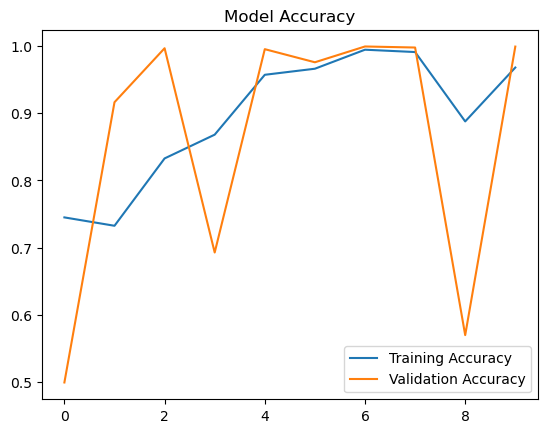

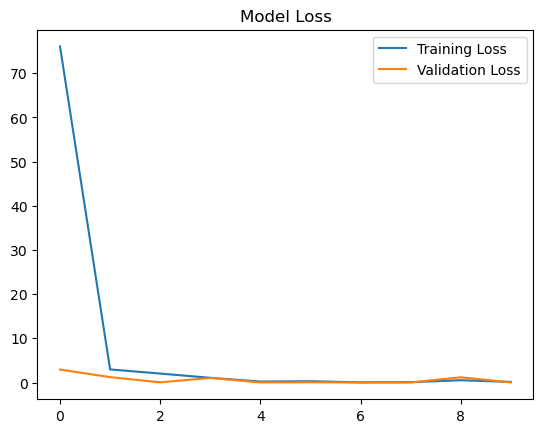

In [73]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Predict on the test set
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legitimate URLs", "Phishing URLs"]))


1631/1631 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9991
F1-Score: 0.9996

Classification Report:
                 precision    recall  f1-score   support

Legitimate URLs       1.00      1.00      1.00     26057
  Phishing URLs       1.00      1.00      1.00     26110

       accuracy                           1.00     52167
      macro avg       1.00      1.00      1.00     52167
   weighted avg       1.00      1.00      1.00     52167



In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the updated GRU model
model = Sequential([
    # First GRU layer with L2 regularization
    GRU(units=128, activation='relu', input_shape=(X_train.shape[1], 1),
        return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Increased dropout to prevent overfitting

    # Second GRU layer with L2 regularization
    GRU(units=64, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),

    # Fully connected output layer
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 113, 128)       │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 113, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,617 (342.25 KB)

 Trainable params: 87,617 (342.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Allow more epochs to stabilize training
    batch_size=64,
    validation_data=(X_val_cleaned, y_val_cleaned),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10
 961/3804 ━━━━━━━━━━━━━━━━━━━━ 4:24 93ms/step - accuracy: 0.4948 - loss: nan